**Alunos:**

Gustavo Negrão R. Souza

Enzo Castelo B. Biondi

Héctor Bruno Bueno Figueira

# **Dataset: UFC Fights (2010 - 2020) with Betting Odds**

---



#**IT´S TIME!**


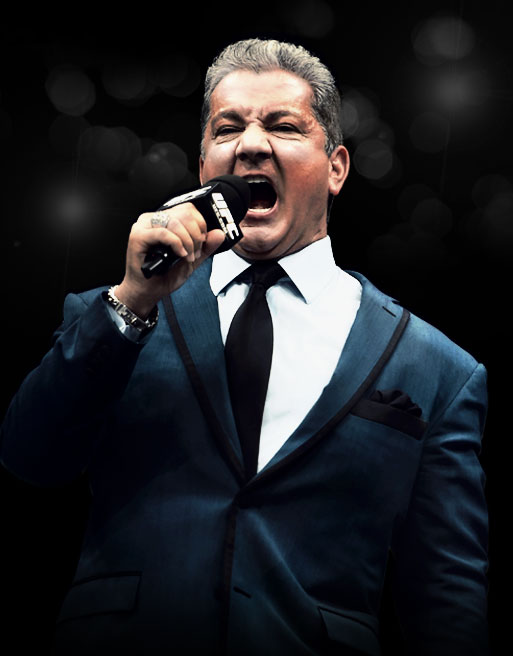

# Instalar o dataset e importar as bibliotecas

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.3 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.0-py3-none-any.whl size=146868 sha256=7a9b3e96e2f6abb1aeeae81dff3938e697304962a750b77dd55f805312921e81
  Stored in directory: /root/.cache/pip/wheels/d6/3c/9e/ede45466d18773c2277fa0b62cb5a5060b4f93ccf0cae2b9c7
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=381e69552b48914db48895e3780957143a0a27aa044709110e600d4ad25cef52
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import openml

dataset_id = 43464
dataset = openml.datasets.get_dataset(43464)

#X - dataframe com as instâncias
#y - array com a variável alvo
X,y,_,_ = dataset.get_data(
    dataset_format="dataframe",target=dataset.default_target_attribute)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
print(y) #não há tributos em y.

None


# Análise inicial do dataset

**Column Definitions:**

R_fighter and B_fighter: The names of the fighter in the red corner and the fighter in the blue corner

R_odds and B_odds: The American odds of the fighter winning.

date: The date of the fight

location: The location of the fight

country: The country the fight occurred in

Winner: The winner of the fight ('Red' or 'Blue')

title_bout: Was this fight a title bout? ('True' or 'False')

weight_class: What weight class did this fight occur at?

gender: Male or Female

In [ ]:
df = X.copy()

In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
...,...,...,...,...,...,...,...,...,...,...,...
5523,None,None,NaN,NaN,None,None,None,None,None,None,None
5524,None,None,NaN,NaN,None,None,None,None,None,None,None
5525,None,None,NaN,NaN,None,None,None,None,None,None,None
5526,None,None,NaN,NaN,None,None,None,None,None,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     4240 non-null   object 
 1   B_fighter     4240 non-null   object 
 2   R_odds        4240 non-null   float64
 3   B_odds        4240 non-null   float64
 4   date          4240 non-null   object 
 5   location      4240 non-null   object 
 6   country       4240 non-null   object 
 7   Winner        4240 non-null   object 
 8   title_bout    4240 non-null   object 
 9   weight_class  4240 non-null   object 
 10  gender        4240 non-null   object 
dtypes: float64(2), object(9)
memory usage: 475.2+ KB


In [ ]:
df.isna().sum() #verifica a quantidade de valores ausentes em cada coluna

R_fighter       1288
B_fighter       1288
R_odds          1288
B_odds          1288
date            1288
location        1288
country         1288
Winner          1288
title_bout      1288
weight_class    1288
gender          1288
dtype: int64

Noção: linhas de dados faltando todos os dados de suas colunas.

Verificaremos se isso caracteriza todos os dados faltantes.

In [ ]:
df = df.dropna(axis=0, how='all') #função que exclui todas as linhas que possuem todos os seus dados como faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     4240 non-null   object 
 1   B_fighter     4240 non-null   object 
 2   R_odds        4240 non-null   float64
 3   B_odds        4240 non-null   float64
 4   date          4240 non-null   object 
 5   location      4240 non-null   object 
 6   country       4240 non-null   object 
 7   Winner        4240 non-null   object 
 8   title_bout    4240 non-null   object 
 9   weight_class  4240 non-null   object 
 10  gender        4240 non-null   object 
dtypes: float64(2), object(9)
memory usage: 397.5+ KB


In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE
4236,John Howard,Daniel Roberts,-210.0,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE
4238,Mike Pierce,Julio Paulino,-420.0,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE


In [ ]:
df.isna().sum()

R_fighter       0
B_fighter       0
R_odds          0
B_odds          0
date            0
location        0
country         0
Winner          0
title_bout      0
weight_class    0
gender          0
dtype: int64

Percebe-se que não há dados faltantes após retirarmos as linhas nulas.

Portanto, temos o dataset sem valores ausentes.

# **1) Fazer uma pequena exploração em cada coluna**

**1.1)** R_odds e B_odds

Explicação sobre os valores que as apostas representam nas casas de apostas:
*   Os valores negativos significam que o lutador é visto como favorito nas casas.
*   Se df['R_odds'] == df['B_odds'], não há favorito.
* o valor df['X_odds'] == -n indica que você lucra $100 a cada n apostados.

* O valor df['X_odds'] == n indica que você lucra n a cada $100 apostados.  

Text(0.5, 0, 'Apostas do lado Vermelho')

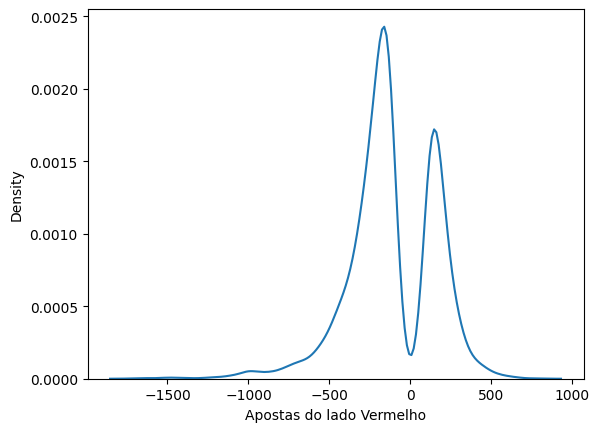

In [ ]:
sns.kdeplot(df['R_odds']).set_xlabel('Apostas do lado Vermelho')

Text(0.5, 0, 'Apostas do lado Azul')

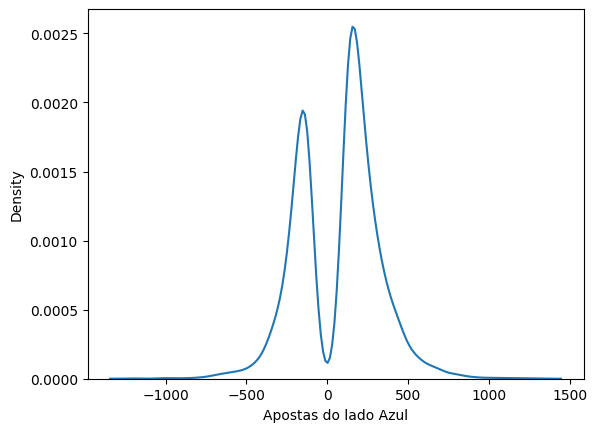

In [ ]:
sns.kdeplot(df['B_odds']).set_xlabel('Apostas do lado Azul')

In [ ]:
df[['R_odds', 'B_odds']].describe()

,R_odds,B_odds
count,4240.000000,4240.000000
mean,-118.092217,68.525708
std,272.796068,252.371462
min,-1700.000000,-1200.000000
25%,-256.250000,-145.000000
50%,-150.000000,130.000000
75%,130.000000,225.000000
max,775.000000,1300.000000


**1.2)** R_fighter e B_fighter

R_fighter: representa o lutador ,normalmente, melhor ranqueado ou campeão. Consequentemente, B_fighter representa o contrário de R_fighter.

In [ ]:
df[['R_fighter', 'B_fighter']].describe()

,R_fighter,B_fighter
count,4240,4240
unique,1217,1400
top,Donald Cerrone,Charles Oliveira
freq,23,18


In [ ]:
df['R_fighter'].value_counts()


Donald Cerrone      23
Jim Miller          20
Demian Maia         18
Joseph Benavidez    17
Ross Pearson        17
                    ..
Ivan Jorge           1
Juan Espino          1
Masio Fullen         1
Roman Salazar        1
Eric Schafer         1
Name: R_fighter, Length: 1217, dtype: int64

In [ ]:
df['B_fighter'].value_counts()


Charles Oliveira    18
Jeremy Stephens     16
Nik Lentz           14
Yancy Medeiros      12
Evan Dunham         12
                    ..
Vanessa Melo         1
Rocky Lee            1
Sheldon Westcott     1
Aisling Daly         1
Chase Gormley        1
Name: B_fighter, Length: 1400, dtype: int64

**1.3)** Country

In [ ]:
df.country.unique()
#OBS: percebe-se que há países sendo contados duas vezes. Ex: 'USA' e ' USA' -> o segundo USA possui um espaço na string.

array(['Brazil', 'USA', ' USA', ' New Zealand', ' Canada', ' Uruguay',
       ' China', ' United Arab Emirates', ' Mexico', ' Denmark',
       ' Australia', ' Singapore', ' Russia', ' Brazil', ' South Korea',
       ' Sweden', ' United Kingdom', ' Czech Republic', ' Argentina',
       ' Germany', ' Chile', ' Poland', ' Japan', ' Netherlands',
       ' Croatia', ' Ireland', ' Philippines'], dtype=object)

In [ ]:
df[['country']].describe()

,country
count,4240
unique,27
top,USA
freq,2491


In [ ]:
df['country'] = df['country'].str.strip() #retorna a string resultante após a remoção do espaço do início e do final da string


<ipython-input-20-e444ab52cf48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].str.strip() #retorna a string resultante após a remoção do espaço do início e do final da string


In [ ]:
df[['country']].describe()

,country
count,4240
unique,25
top,USA
freq,2502


In [ ]:
df['country'].value_counts() #quantidade de lutas que ocorreram em cada país.

USA                     2502
Brazil                   423
Canada                   341
United Kingdom           169
Australia                164
Sweden                    72
Mexico                    71
China                     62
Germany                   55
Japan                     55
Singapore                 45
Russia                    36
New Zealand               33
United Arab Emirates      31
Netherlands               25
South Korea               24
Poland                    23
Ireland                   20
Czech Republic            13
Chile                     13
Denmark                   13
Uruguay                   13
Croatia                   13
Argentina                 12
Philippines               12
Name: country, dtype: int64

**1.4)** Location

In [ ]:
df.location.unique()

array(['Brasilia, Distrito Federal, Brazil', 'Las Vegas, Nevada, USA',
       'Norfolk, Virginia, USA', 'Auckland, New Zealand',
       'Minneapolis, Minnesota, USA', 'Greenville, South Carolina, USA',
       'Rio Rancho, New Mexico, USA', 'Sacramento, California, USA',
       'San Antonio, Texas, USA', 'Edmonton, Alberta, Canada',
       'Newark, New Jersey, USA', 'Houston, Texas, USA',
       'Montevideo, Uruguay', 'Anaheim, California, USA',
       'Shenzhen, Guangdong, China',
       'Abu Dhabi, Abu Dhabi, United Arab Emirates',
       'Vancouver, British Columbia, Canada',
       'Mexico City, Distrito Federal, Mexico', 'Copenhagen, Denmark',
       'Melbourne, Victoria, Australia', 'Raleigh, North Carolina, USA',
       'Tampa, Florida, USA', 'Boston, Massachusetts, USA',
       'Kallang, Singapore', 'New York City, New York, USA',
       'Moscow, Moscow, Russia', 'Sao Paulo, Sao Paulo, Brazil',
       'Busan, South Korea', 'Washington, DC, USA',
       'Chicago, Illinois, USA', 

In [ ]:
df[['location']].describe()

,location
count,4240
unique,144
top,"Las Vegas, Nevada, USA"
freq,764


In [ ]:
df['location'].value_counts()

Las Vegas, Nevada, USA             764
Chicago, Illinois, USA              81
Newark, New Jersey, USA             81
London, England, United Kingdom     77
Toronto, Ontario, Canada            74
                                  ... 
Bangor, Maine, USA                  10
Berlin, Germany                     10
Omaha, Nebraska, USA                 9
Ledyard, Connecticut, USA            9
Hollywood, Florida, USA              9
Name: location, Length: 144, dtype: int64

**1.5)** Winner

In [ ]:
df['Winner'].describe()

count     4240
unique       3
top        Red
freq      2430
Name: Winner, dtype: object

In [ ]:
df['Winner'].unique() #apareceu 'Draw'(empate)

array(['Blue', 'Red', 'Draw'], dtype=object)

In [ ]:
df['Winner'].value_counts()

Red     2430
Blue    1737
Draw      73
Name: Winner, dtype: int64

**1.6)** Title_bout

In [ ]:
df['title_bout'].unique()

array([False, True], dtype=object)

In [ ]:
df['title_bout'].describe()
#há 214 lutas que valem o cinturão

count      4240
unique        2
top       False
freq       4026
Name: title_bout, dtype: object

**1.7)** weight_class

In [ ]:
df['weight_class'].unique()

array(['Lightweight', 'Welterweight', 'Light Heavyweight', 'Flyweight',
       "Women's Strawweight", 'Bantamweight', "Women's Flyweight",
       "Women's Bantamweight", 'Middleweight', 'Featherweight',
       "Women's Featherweight", 'Heavyweight', 'Catch Weight'],
      dtype=object)

In [ ]:
df['weight_class'].describe()

count            4240
unique             13
top       Lightweight
freq              786
Name: weight_class, dtype: object

In [ ]:
df['weight_class'].value_counts()

Lightweight              786
Welterweight             752
Middleweight             513
Featherweight            487
Bantamweight             422
Light Heavyweight        349
Heavyweight              323
Flyweight                205
Women's Strawweight      164
Women's Bantamweight     130
Women's Flyweight         78
Catch Weight              17
Women's Featherweight     14
Name: weight_class, dtype: int64

**1.8)** gender

In [ ]:
df['gender'].value_counts()
#quantidade de lutas masculinas valem quase 1000% da quantidade de lutas femininas.

MALE      3854
FEMALE     386
Name: gender, dtype: int64

**1.9)** date

Aqui criamos um atributo Ano ao dividir o atributo date em 3 partes através do comando split e pegamos a terceira parte do date.

In [ ]:
df['year']=[a.split('/')[-1] for a in df['date']]

<ipython-input-35-90f2e1624df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=[a.split('/')[-1] for a in df['date']]


In [ ]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020


In [ ]:
df['date'] = pd.to_datetime(X['date'], format='%m/%d/%Y')

<ipython-input-37-b729433b81fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(X['date'], format='%m/%d/%Y')


Os dados apresentados foram referentes às lutas que aconteceram até o mês de março do ano de 2020

# **2) Análises interessantes entre as colunas**

# **2.1)** Analisar quem obteve a melhor taxa de aproveitamento

Criar duas colunas que representam o lutador vencedor e o lutador perdedor

In [ ]:
vencedor = []
perdedor = []
for index, col in df.iterrows():
  if col['Winner'] == 'Red':
    vencedor.append(col['R_fighter'])
    perdedor.append(col['B_fighter'])
  elif col['Winner'] == 'Blue':
    vencedor.append(col['B_fighter'])
    perdedor.append(col['R_fighter'])
  elif col['Winner'] == 'Draw':
    vencedor.append('Draw')
    perdedor.append('Draw')



In [ ]:
df['Vencedor'] = vencedor
df['Perdedor'] = perdedor

<ipython-input-39-bfa57cbb21b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vencedor'] = vencedor
<ipython-input-39-bfa57cbb21b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Perdedor'] = perdedor


In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino


In [ ]:
df['Vencedor'].value_counts()

Draw                73
Donald Cerrone      23
Charles Oliveira    17
Max Holloway        17
Jon Jones           17
                    ..
Jason Gonzalez       1
Marcel Fortuna       1
Aiemann Zahabi       1
Albert Morales       1
Jason Brilz          1
Name: Vencedor, Length: 1135, dtype: int64

In [ ]:
df['Perdedor'].value_counts()

Draw                   73
Ross Pearson           13
Jim Miller             12
Jeremy Stephens        12
Michael Johnson        11
                       ..
Taila Santos            1
Ricardo Ramos           1
Peggy Morgan            1
Alexander Hernandez     1
Chase Gormley           1
Name: Perdedor, Length: 1449, dtype: int64

Gerar um df_resultado que expressa o Nome do lutador, o Total de Lutas, Quantidade de Vitórias e Aproveitamento

In [ ]:
# Combinar as colunas 'R_fighter' e 'B_fighter' para obter o total de lutas
total_lutas = pd.concat([df['R_fighter'], df['B_fighter']], ignore_index=True).value_counts()

# Calcular a ocorrência dos nomes em 'Vencedores'
contagem_vencedores = df['Vencedor'].value_counts()

# Calcular o aproveitamento de cada lutador
aproveitamento=contagem_vencedores*100/total_lutas

# Criar um novo DataFrame com os resultados
df_resultado = pd.DataFrame({
    'Nome': total_lutas.index,
    'Total de Lutas': total_lutas.reindex(total_lutas.index).values.astype(int),
    'Vitórias': contagem_vencedores.reindex(total_lutas.index).fillna(0).values.astype(int),
    'Aproveitamento':aproveitamento.reindex(total_lutas.index).fillna(0).values.astype(float)
})

df_resultado

,Nome,Total de Lutas,Vitórias,Aproveitamento
0,Donald Cerrone,34,23,67.647059
1,Jim Miller,28,15,53.571429
2,Charles Oliveira,26,17,65.384615
3,Demian Maia,25,16,64.000000
4,Rafael Dos Anjos,25,16,64.000000
...,...,...,...,...
1557,Billy Quarantillo,1,1,100.000000
1558,Punahele Soriano,1,1,100.000000
1559,Tom Blackledge,1,0,0.000000
1560,Maciej Jewtuszko,1,0,0.000000


In [ ]:
#exibir a Média e o desvio padrão do Dataframe Resultado
df_resultado.describe()

,Total de Lutas,Vitórias,Aproveitamento
count,1562.000000,1562.000000,1562.000000
mean,5.428937,2.667734,38.657028
std,4.623881,3.166180,30.239005
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.000000,1.000000,40.000000
75%,7.000000,4.000000,60.000000
max,34.000000,23.000000,100.000000


Gerar um gráfico de barras que expressa: quantidade de lutadores (eixo y) que participaram de uma quantidade específica de lutas (eixo x).

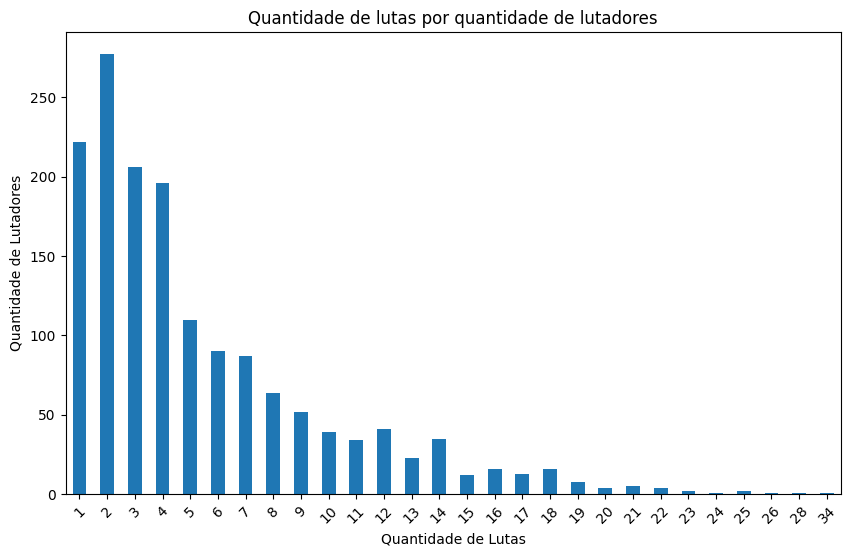

In [ ]:
plt.figure(figsize=(10, 6))
df_resultado['Total de Lutas'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Quantidade de Lutas')
plt.ylabel('Quantidade de Lutadores')
plt.title('Quantidade de lutas por quantidade de lutadores')
plt.xticks(rotation=45)

plt.show()

Visualizar outliers de Total de Lutas e de Total de Vitórias

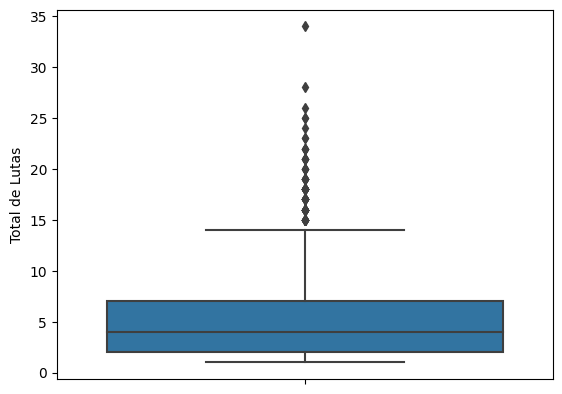

In [ ]:
sns.boxplot(y=df_resultado['Total de Lutas'])
plt.show()

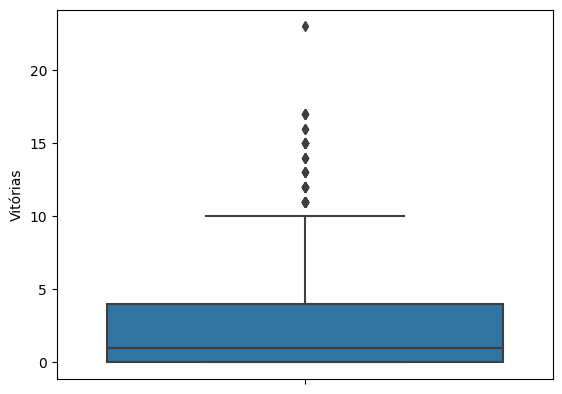

In [ ]:
sns.boxplot(y=df_resultado['Vitórias'])
plt.show()

* Gráfico que relaciona total de vitórias(eixo x) e total de lutas(eixo y). Em outras palavras, o aproveitamento.
* A reta traçada representa os lutadores que obtiveram 100% de aproveitamento


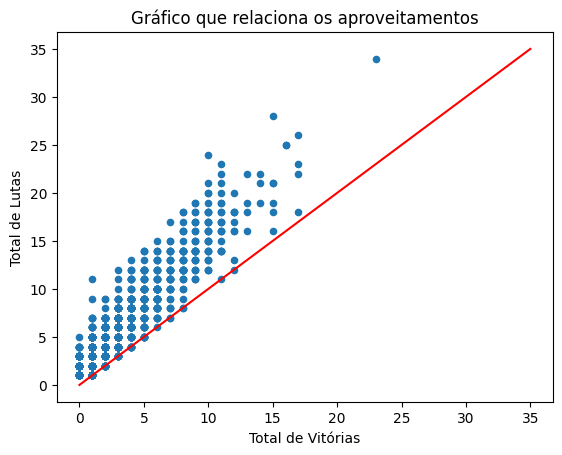

In [ ]:
xeixo=np.linspace(0,35,35)
df_resultado.plot.scatter(x='Vitórias' , y='Total de Lutas')
plt.xlabel('Total de Vitórias')
plt.title('Gráfico que relaciona os aproveitamentos')
plt.plot(xeixo,np.linspace(0,35,35) ,color='r')

Função que, ao inserir um lutador, apresenta o seu total de lutas, total de vitórias e aproveitamento.

In [ ]:
def lutador (nome):
  condicao = df[['R_fighter', 'B_fighter']].apply(lambda row: nome in row.values, axis=1)
  linhas_filtradas = df[condicao]
  df_filtrado = pd.DataFrame(linhas_filtradas)
  total_de_lutas = len(df_filtrado)
  vitorias=0
  for index, col in df_filtrado.iterrows():
    if col['Vencedor'] == nome:
      vitorias = vitorias+1
  aproveitamento = vitorias*100 / total_de_lutas
  print(f"total de lutas: {total_de_lutas}")
  print(f"total de vitorias: {vitorias}")
  print(f"aproveitamento: {aproveitamento:,.4f}%")
  #return (df_filtrado)


In [ ]:
lutador ('Donald Cerrone')

total de lutas: 34
total de vitorias: 23
aproveitamento: 67.6471%


Função fase_do_lutador: ao determinar o nome do lutador e uma data qualquer, mostra-se o aproveitamento ao longo dos anos até essa data e as lutas anteriores a essa data.

Função aproveitamento_anual: utilizada para auxiliar a função anterior por meio de retornar o aproveitamento do ano ao estabelecer o nome do lutador e uma data.

In [ ]:
def aproveitamento_anual(nome, ano, data):
  condicao = (df[['R_fighter', 'B_fighter']].apply(lambda row: nome in row.values, axis=1)) & (df['year'] == ano) & (df['date'] < data)
  linhas_filtradas = df[condicao]
  df_filtrado = pd.DataFrame(linhas_filtradas)
  total_de_lutas = len(df_filtrado)
  vitorias=0
  for index, col in df_filtrado.iterrows():
    if col['Vencedor'] == nome:
      vitorias = vitorias+1
  if total_de_lutas == 0:
    aproveitamento = 0
  else:
    aproveitamento = vitorias*100 / total_de_lutas
  return aproveitamento

In [ ]:
def fase_do_lutador (nome, data):
  data = pd.to_datetime(data, format= '%m/%d/%Y')
  condicao = (df[['R_fighter', 'B_fighter']].apply(lambda row: nome in row.values, axis=1)) & (df['date'] < data)
  linhas_filtradas = df[condicao]
  df_filtrado = pd.DataFrame(linhas_filtradas)
  total_de_lutas = len(df_filtrado)
  vitorias=0
  for index, col in df_filtrado.iterrows():
    if col['Vencedor'] == nome:
      vitorias = vitorias+1
  aproveitamento = vitorias*100 / total_de_lutas
  print(f"total de lutas: {total_de_lutas}")
  print(f"total de vitorias: {vitorias}")
  print(f"aproveitamento: {aproveitamento:,.4f}%") #aproveitamento geral anterior à data
  year = data.year
  ano = []
  aprov_por_ano = []
  for i in range(2010, (year + 1)):
    ano = np.append(ano, str(i))
    aprov_por_ano = np.append(aprov_por_ano, aproveitamento_anual(nome, str(i), data))

#Gráfico que representa o aproveitamento ao longo dos anos
  sns.set(style="darkgrid")
  sns.barplot( x=ano, y=aprov_por_ano)
  plt.xlabel("Ano")
  plt.ylabel("Aproveitamento (%)")
  plt.title('Aproveitamento ao longo dos anos')
  plt.show()

#df_filtrado representa todas linhas que o lutador participou antes da data fornecida
  df_filtrado

  return df_filtrado

In [ ]:
#transformamos as datas fornecidas pelo usuário para a função como datetime com a finalidade de compará-las com as datas do dataframe

total de lutas: 16
total de vitorias: 13
aproveitamento: 81.2500%


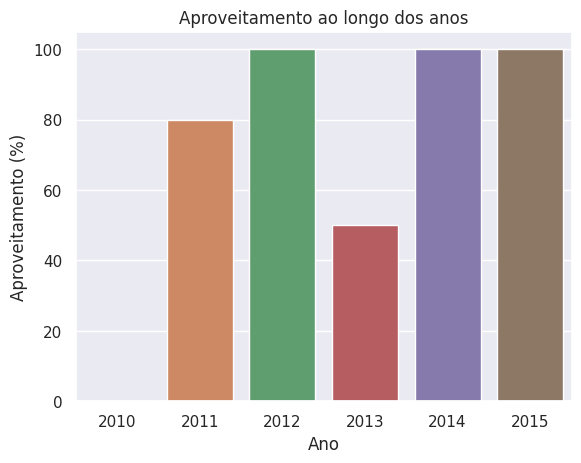

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor
2488,Donald Cerrone,Myles Jury,-125.0,115.0,2015-01-03,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,2015,Donald Cerrone,Myles Jury
2623,Donald Cerrone,Eddie Alvarez,-135.0,125.0,2014-09-27,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,2014,Donald Cerrone,Eddie Alvarez
2726,Donald Cerrone,Jim Miller,-240.0,220.0,2014-07-16,"Atlantic City, New Jersey, USA",USA,Red,False,Lightweight,MALE,2014,Donald Cerrone,Jim Miller
2860,Donald Cerrone,Edson Barboza,160.0,-170.0,2014-04-19,"Orlando, Florida, USA",USA,Red,False,Lightweight,MALE,2014,Donald Cerrone,Edson Barboza
2970,Donald Cerrone,Adriano Martins,-170.0,160.0,2014-01-25,"Chicago, Illinois, USA",USA,Red,False,Lightweight,MALE,2014,Donald Cerrone,Adriano Martins
3049,Donald Cerrone,Evan Dunham,-125.0,115.0,2013-11-16,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,2013,Donald Cerrone,Evan Dunham
3152,Donald Cerrone,Rafael Dos Anjos,105.0,-115.0,2013-08-28,"Indianapolis, Indiana, USA",USA,Blue,False,Lightweight,MALE,2013,Rafael Dos Anjos,Donald Cerrone
3238,Donald Cerrone,KJ Noons,-270.0,248.0,2013-05-25,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,2013,Donald Cerrone,KJ Noons
3367,Anthony Pettis,Donald Cerrone,-150.0,140.0,2013-01-26,"Chicago, Illinois, USA",USA,Red,False,Lightweight,MALE,2013,Anthony Pettis,Donald Cerrone
3498,Donald Cerrone,Melvin Guillard,-335.0,305.0,2012-08-11,"Denver, Colorado, USA",USA,Red,False,Lightweight,MALE,2012,Donald Cerrone,Melvin Guillard


In [ ]:
fase_do_lutador('Donald Cerrone', '01/05/2015')

Criamos uma função que recebe um lutador e uma data e mostra a quantos dias este lutador está sem lutar em relação a data inserida.

In [ ]:
def ultima_luta(nome, data):
  data = pd.to_datetime(data, format= '%m/%d/%Y')
  condicao = (df[['R_fighter', 'B_fighter']].apply(lambda row: nome in row.values, axis=1)) & (df['date'] < data)
  linhas_filtradas = df[condicao]
  df_filtrado = pd.DataFrame.reset_index(pd.DataFrame(linhas_filtradas))
  dias = "Faz {} dias que o {} não luta".format(((data - df_filtrado['date'][0]).days), nome)
  return dias

In [ ]:
ultima_luta('Conor McGregor', '05/21/2020')

'Faz 124 dias que o Conor McGregor não luta'

# **2.2)** Analisar se o lutador considerado favorito venceu

In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino


Gerar a coluna de Favorito com base na casa de apostas, retornando o nome do favorito.

In [ ]:
favorito = []
for index, col in df.iterrows():
  if col['R_odds'] < col['B_odds']:
    favorito.append(col['R_fighter'])
  elif  col['R_odds'] > col['B_odds']:
    favorito.append(col['B_fighter'])
  elif col['R_odds'] == col['B_odds']:
    favorito.append("Sem favorito")

In [ ]:
df['Favorito'] = favorito

<ipython-input-59-def794f30307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Favorito'] = favorito


In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce


Intuito geral: Verificar se o favorito venceu.

Gerar um coluna que diz qual é a cor do favorito a fim de compará-la com a coluna "Winner".

In [ ]:
df['favorito_cor'] = ' '

<ipython-input-61-6d659a02d319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorito_cor'] = ' '


In [ ]:
red_favorito = df['R_odds'] < df['B_odds']
blue_favorito = df['R_odds'] > df['B_odds']
sem_favorito = df['R_odds'] == df['B_odds']

In [ ]:
df['favorito_cor'][red_favorito] = 'Red'
df['favorito_cor'][blue_favorito] = 'Blue'
df['favorito_cor'][sem_favorito] = 'Sem favorito'


<ipython-input-63-29e9dcb20545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorito_cor'][red_favorito] = 'Red'
<ipython-input-63-29e9dcb20545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorito_cor'][red_favorito] = 'Red'
<ipython-input-63-29e9dcb20545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorito_cor'][blue_favorito] = 'Blue'
<ipython-input-63-29e9dcb20545>:2: SettingWithCopyWarning: 
A value is 

In [ ]:
df['favorito_cor'].value_counts()

Red             2663
Blue            1493
Sem favorito      84
Name: favorito_cor, dtype: int64

In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red


Como não é possível apostar em empate, necessita-se retirar os casos em que não há favoritos

In [ ]:
df_com_favorito = pd.DataFrame.reset_index(df[df['favorito_cor'] != "Sem favorito"]).drop("index", axis = 'columns')

In [ ]:
df_com_favorito

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red
4152,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red
4153,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red
4154,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red


In [ ]:
df_com_favorito["favorito_cor"].value_counts()

Red     2663
Blue    1493
Name: favorito_cor, dtype: int64

In [ ]:
df_com_favorito["Winner"].value_counts()

Red     2382
Blue    1706
Draw      68
Name: Winner, dtype: int64

Para verificar se o favorito vence, perde ou empata, criamos uma coluna nova que diz isso.

In [ ]:
df_com_favorito['favorito_vence'] = ' '
vence = df_com_favorito['favorito_cor'] == df_com_favorito['Winner']
empate = df_com_favorito['Winner'] == 'Draw'
perde = (df_com_favorito['favorito_cor'] != df_com_favorito['Winner']) & (df_com_favorito['Winner'] != 'Draw')

In [ ]:
df_com_favorito['favorito_vence'][vence] = 'Vence'
df_com_favorito['favorito_vence'][empate] = 'Empate'
df_com_favorito['favorito_vence'][perde] = 'Perde'




<ipython-input-71-d509e0d57a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_favorito['favorito_vence'][vence] = 'Vence'
<ipython-input-71-d509e0d57a1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_favorito['favorito_vence'][empate] = 'Empate'
<ipython-input-71-d509e0d57a1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_favorito['favorito_vence'][perde] = 'Perde'


In [ ]:
df_com_favorito

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor,favorito_vence
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red,Perde
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue,Vence
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red,Vence
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red,Perde
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red,Vence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red,Perde
4152,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red,Vence
4153,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red,Vence
4154,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red,Vence


In [ ]:
df_com_favorito['favorito_vence'].value_counts()

Vence     2679
Perde     1409
Empate      68
Name: favorito_vence, dtype: int64

Para facilitar a visualização, criamos gráficos que mostram a relação entre vitórias, derrotas e empates dos considerados favoritos.

<Axes: title={'center': 'Relação de Vitórias, de Derrotas e de Empates dos Favoritos'}>

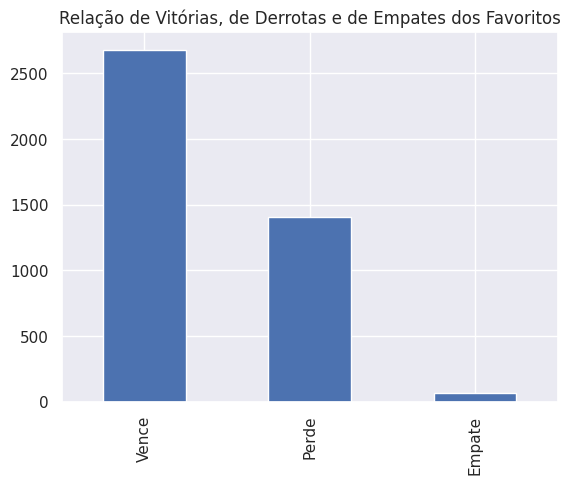

In [ ]:
df_com_favorito['favorito_vence'].value_counts().plot.bar(title='Relação de Vitórias, de Derrotas e de Empates dos Favoritos')

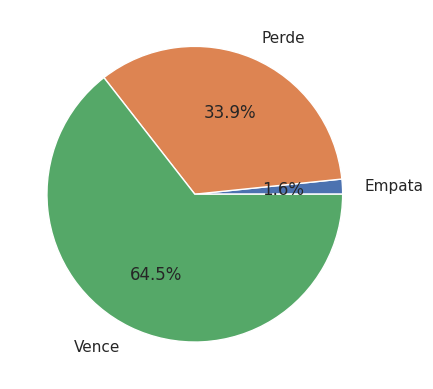

In [ ]:
occur = df_com_favorito.groupby(['favorito_vence']).size()
nomes='Empata', 'Perde', 'Vence',
plt.pie(occur, labels=nomes, labeldistance=1.15 ,autopct='%1.1f%%')
plt.show()

Criamos um gráfico que mostra a porcentagem de vitórias do lutador melhor rankeado

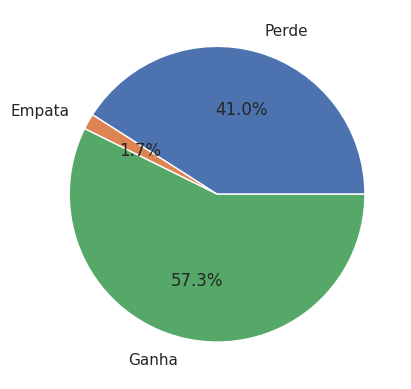

In [ ]:
occur2 = df.groupby(['Winner']).size()
nomes='Perde', 'Empata', 'Ganha',
plt.pie(occur2, labels=nomes, labeldistance=1.15, autopct='%1.1f%%')
plt.show()

# **2.3)** Ver a quantidade de lutas ao longo dos anos

In [ ]:
 df['year'].describe()

count     4240
unique      11
top       2019
freq       512
Name: year, dtype: object

In [ ]:
df['year'].value_counts()

2019    512
2014    503
2016    493
2018    474
2015    473
2017    451
2013    386
2012    341
2011    300
2010    212
2020     95
Name: year, dtype: int64

Criamos um gráfico que mostra a quantidade de lutas por ano.

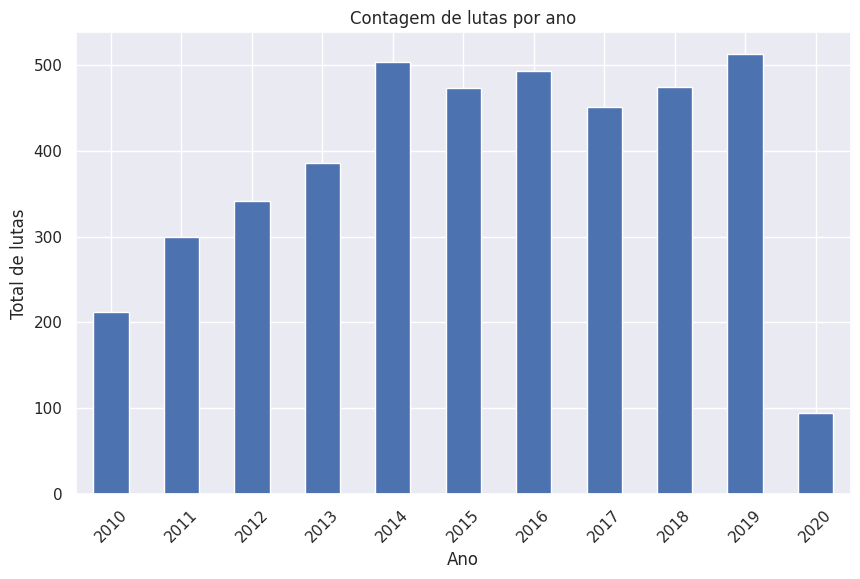

In [ ]:
# Fazer uma cópia do DataFrame
df_ordenado = df.copy()

# Ordenar os valores no eixo x
df_ordenado.sort_values('year', inplace=True)

plt.figure(figsize=(10, 6))
df_ordenado['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Total de lutas')
plt.title('Contagem de lutas por ano')
plt.xticks(rotation=45)

plt.show()


Analisando a distribuição de luta ao longo dos anos por meio do gênero.

In [ ]:
df['gender'].value_counts()

MALE      3854
FEMALE     386
Name: gender, dtype: int64

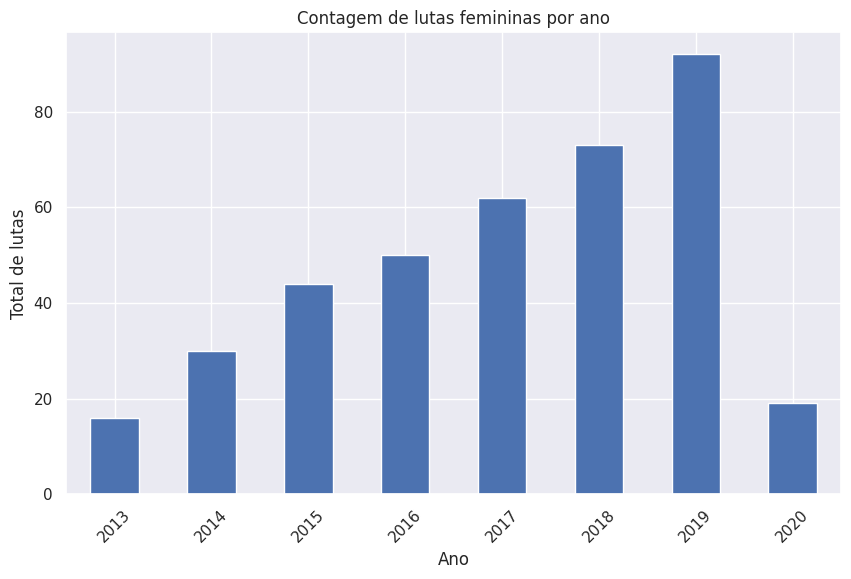

In [ ]:
df_genero = df.groupby('gender')
df_mulher = df_genero.get_group('FEMALE')
df_ordenado_m = df_mulher.copy()


df_ordenado_m.sort_values('year', inplace=True)


plt.figure(figsize=(10, 6))
df_ordenado_m['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Total de lutas')
plt.title('Contagem de lutas femininas por ano')
plt.xticks(rotation=45)

plt.show()


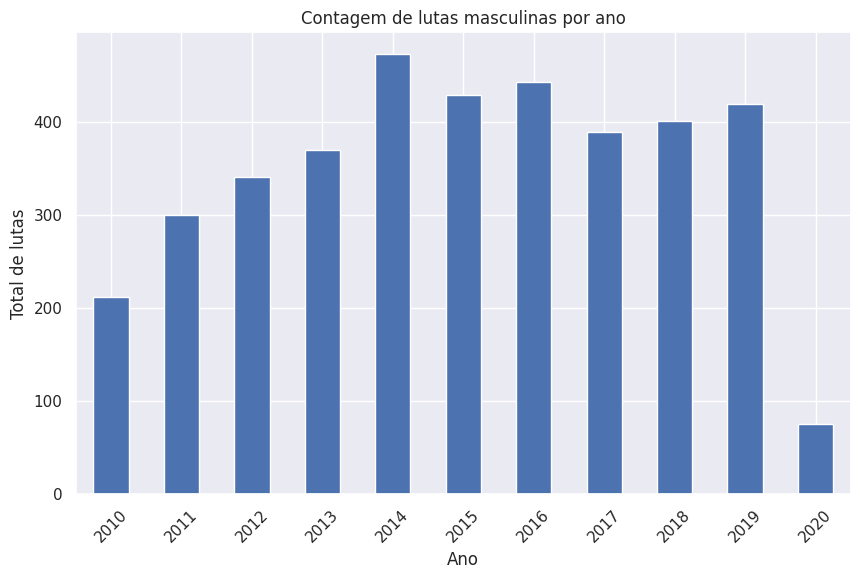

In [ ]:
df_genero = df.groupby('gender')
df_homem = df_genero.get_group('MALE')
df_ordenado_m = df_homem.copy()


df_ordenado_m.sort_values('year', inplace=True)


plt.figure(figsize=(10, 6))
df_ordenado_m['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Total de lutas')
plt.title('Contagem de lutas masculinas por ano')
plt.xticks(rotation=45)

plt.show()

Vendo a quantidade de lutas valendo título em comparação com as outras por ano

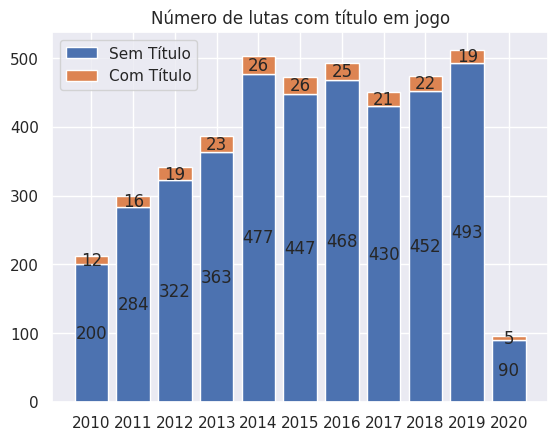

In [ ]:
groups = np.flip(np.array(df['year'].unique()))
Sem_Titulo = np.array((df['year'].where(df['title_bout'] == False).value_counts()).sort_index())
Com_Titulo = np.array((df['year'].where(df['title_bout'] == True).value_counts()).sort_index())
fig, ax = plt.subplots()



p = ax.bar(groups, Sem_Titulo, label='Sem Título')
ax.bar_label(p, label_type='center')
b = ax.bar(groups, Com_Titulo, label = 'Com Título', bottom = Sem_Titulo)
ax.bar_label(b, label_type='center')




ax.set_title('Número de lutas com título em jogo')
ax.legend()

plt.show()


Analisando a distribuição de luta ao longo dos anos por categoria de peso

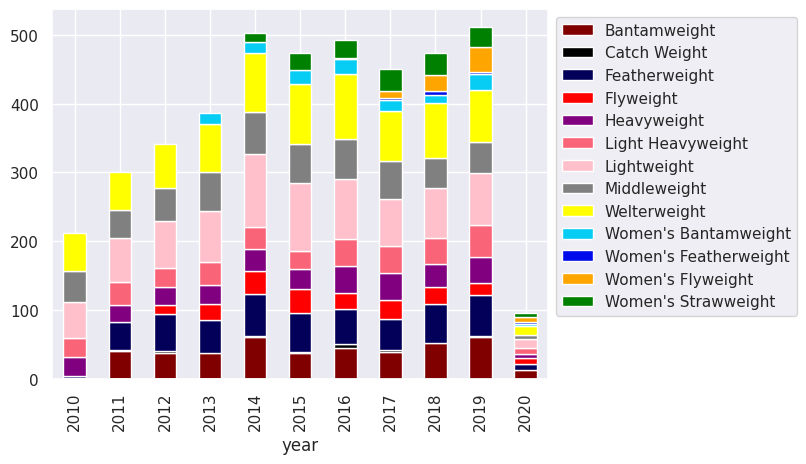

In [ ]:
df.groupby(['year', 'weight_class']).size().unstack().plot(kind='bar', stacked=True, color={"Bantamweight": "Maroon", "Catch Weight": "#000000", "Featherweight": "#030059",
                                                                                            "Flyweight": "Red", "Heavyweight": "Purple", "Light Heavyweight": "#fa6478",
                                                                                            "Lightweight": "Pink", "Middleweight": "Gray", "Welterweight": "Yellow",
                                                                                            "Women's Bantamweight": "#07cdf5", "Women's Featherweight": "#000ceb",
                                                                                            "Women's Flyweight": "Orange", "Women's Strawweight": "Green"}).legend(bbox_to_anchor=(1,1))

# **2.4)** Analisar o número de eventos por país ao longo dos anos

In [ ]:
df['country'].value_counts()

USA                     2502
Brazil                   423
Canada                   341
United Kingdom           169
Australia                164
Sweden                    72
Mexico                    71
China                     62
Germany                   55
Japan                     55
Singapore                 45
Russia                    36
New Zealand               33
United Arab Emirates      31
Netherlands               25
South Korea               24
Poland                    23
Ireland                   20
Czech Republic            13
Chile                     13
Denmark                   13
Uruguay                   13
Croatia                   13
Argentina                 12
Philippines               12
Name: country, dtype: int64

In [ ]:
df['date'].value_counts()

2016-11-19    25
2014-10-04    23
2014-05-31    22
2014-08-23    21
2014-06-28    21
              ..
2012-02-15     9
2015-06-27     9
2014-08-30     8
2014-04-11     8
2014-03-01     8
Name: date, Length: 362, dtype: int64

Verificamos que podemos ter mais de um evento por dia, para isso criamos a função evento_dias para visualizar melhor isto.

In [ ]:
def eventos_dias (data):
  condicao2 = (df['date'] == data)
  linhas_filtradas2 = df[condicao2]
  df_filtrado2 = pd.DataFrame(linhas_filtradas2)

  return df_filtrado2

In [ ]:
eventos_dias('2016/11/19')

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
1604,Ryan Bader,Rogerio Nogueira,-340.0,280.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Light Heavyweight,MALE,2016,Ryan Bader,Rogerio Nogueira,Ryan Bader,Red
1605,Thomas Almeida,Albert Morales,-300.0,250.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Bantamweight,MALE,2016,Thomas Almeida,Albert Morales,Thomas Almeida,Red
1606,Claudia Gadelha,Cortney Casey,-460.0,365.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Women's Strawweight,FEMALE,2016,Claudia Gadelha,Cortney Casey,Claudia Gadelha,Red
1607,Thales Leites,Krzysztof Jotko,-135.0,115.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Blue,False,Middleweight,MALE,2016,Krzysztof Jotko,Thales Leites,Thales Leites,Red
1608,Warlley Alves,Kamaru Usman,175.0,-210.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Blue,False,Welterweight,MALE,2016,Kamaru Usman,Warlley Alves,Kamaru Usman,Blue
1609,Sergio Moraes,Zak Ottow,-150.0,130.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Welterweight,MALE,2016,Sergio Moraes,Zak Ottow,Sergio Moraes,Red
1610,Cezar Ferreira,Jack Hermansson,110.0,-130.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Middleweight,MALE,2016,Cezar Ferreira,Jack Hermansson,Jack Hermansson,Blue
1611,Marcos Rogerio de Lima,Gadzhimurad Antigulov,-165.0,145.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2016,Gadzhimurad Antigulov,Marcos Rogerio de Lima,Marcos Rogerio de Lima,Red
1612,Johnny Eduardo,Manvel Gamburyan,-140.0,120.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Bantamweight,MALE,2016,Johnny Eduardo,Manvel Gamburyan,Johnny Eduardo,Red
1613,Luis Henrique,Christian Colombo,-290.0,245.0,2016-11-19,"Sao Paulo, Sao Paulo, Brazil",Brazil,Red,False,Heavyweight,MALE,2016,Luis Henrique,Christian Colombo,Luis Henrique,Red


Criamos uma lista que mostra quantos eventos ocorreram em cada país, em seguida convertemos em um dataframe

In [ ]:
pais = []
total_eventos = []
for pais2 in df['country'].unique():
  pais.append(pais2)
  condicao4 = (df['country'] == pais2)
  linhas_filtradas4 = df[condicao4]
  df_filtrado4 = pd.DataFrame(linhas_filtradas4)
  total_eventos_pais2 = df_filtrado4['date'].nunique()
  total_eventos.append(total_eventos_pais2)
  print(f"{pais2} ocorreu {total_eventos_pais2} eventos")

Brazil ocorreu 36 eventos
USA ocorreu 217 eventos
New Zealand ocorreu 3 eventos
Canada ocorreu 29 eventos
Uruguay ocorreu 1 eventos
China ocorreu 6 eventos
United Arab Emirates ocorreu 3 eventos
Mexico ocorreu 6 eventos
Denmark ocorreu 1 eventos
Australia ocorreu 14 eventos
Singapore ocorreu 4 eventos
Russia ocorreu 3 eventos
South Korea ocorreu 2 eventos
Sweden ocorreu 6 eventos
United Kingdom ocorreu 15 eventos
Czech Republic ocorreu 1 eventos
Argentina ocorreu 1 eventos
Germany ocorreu 5 eventos
Chile ocorreu 1 eventos
Poland ocorreu 2 eventos
Japan ocorreu 5 eventos
Netherlands ocorreu 2 eventos
Croatia ocorreu 1 eventos
Ireland ocorreu 2 eventos
Philippines ocorreu 1 eventos


In [ ]:
lista_de_tuplas = list(zip(pais, total_eventos))
# converte uma lista de tuplas num DataFrame
df2 = pd.DataFrame(lista_de_tuplas, columns=['País', 'Total_de_eventos'])
df3 = pd.DataFrame.reset_index(df2.sort_values(by='Total_de_eventos', ascending=False)).drop('index', axis='columns')
df3

,País,Total_de_eventos
0,USA,217
1,Brazil,36
2,Canada,29
3,United Kingdom,15
4,Australia,14
5,China,6
6,Mexico,6
7,Sweden,6
8,Japan,5
9,Germany,5


Criamos uma função que recebe um país e uma categoria de peso, e faz um gráfico de lutas dessa categoria no país ao longo dos anos.

In [ ]:
def pesoporpais (pais,categoria):
  dfpais=df[df['country'] == pais]
  dfpais=dfpais[df['weight_class'] == categoria]
  dfpais['year'].value_counts().sort_index().plot.bar(xlabel= 'Total de lutas por ano no pais '+pais+'\n da categoria '+categoria+'')

<ipython-input-91-6203a6455ad6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfpais=dfpais[df['weight_class'] == categoria]


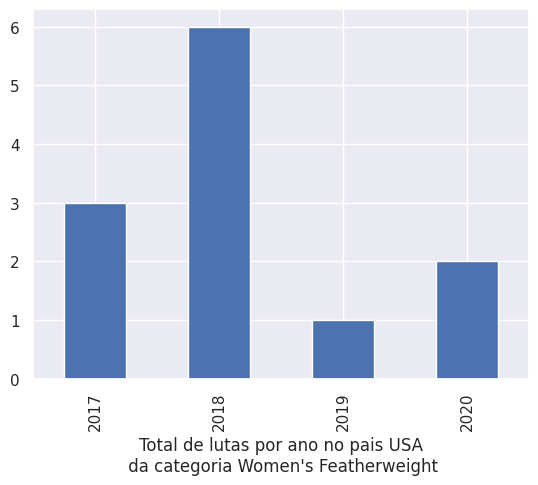

In [ ]:
pesoporpais('USA',"Women's Featherweight")

# **3) Padronizar as apostas**

In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red


Utilizando Padronização 0-1 / normalização linear [0 1]


In [ ]:
# Padronização das colunas R_odds e B_odds
df_norm = df.copy()
min_value = df_norm[['R_odds', 'B_odds']].min().min()
max_value = df_norm[['R_odds', 'B_odds']].max().max()
df_norm[['R_odds', 'B_odds']] = (df_norm[['R_odds', 'B_odds']] - min_value) / (max_value - min_value)

df_norm


,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
0,Kevin Lee,Charles Oliveira,0.518333,0.611667,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red
1,Demian Maia,Gilbert Burns,0.620000,0.510000,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue
2,Renato Moicano,Damir Hadzovic,0.451667,0.671667,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red
3,Johnny Walker,Nikita Krylov,0.521000,0.609000,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red
4,Francisco Trinaldo,John Makdessi,0.513333,0.616667,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,0.515000,0.611667,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red
4236,John Howard,Daniel Roberts,0.496667,0.625000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red
4237,Brendan Schaub,Chase Gormley,0.480000,0.640000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red
4238,Mike Pierce,Julio Paulino,0.426667,0.678333,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red


* Foi necessário padronizar os valores das duas colunas juntas a fim de que não houvesse trocas de favoritos em uma mesma linha.
* os lutadores com o valor das apostas menores são considerados mais favoritos

Text(0.5, 0, 'Apostas do lado Vermelho')

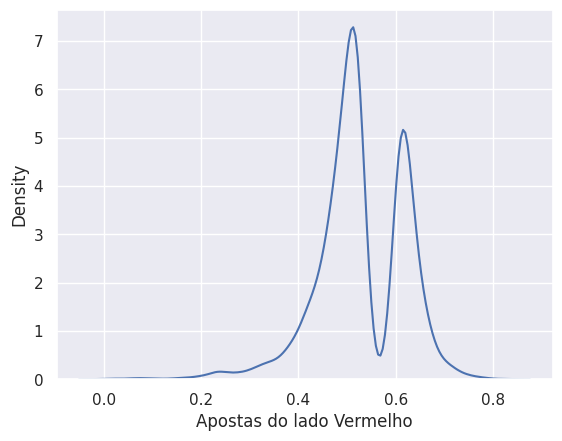

In [ ]:
sns.kdeplot(df_norm['R_odds']).set_xlabel('Apostas do lado Vermelho')


Text(0.5, 0, 'Apostas do lado Azul')

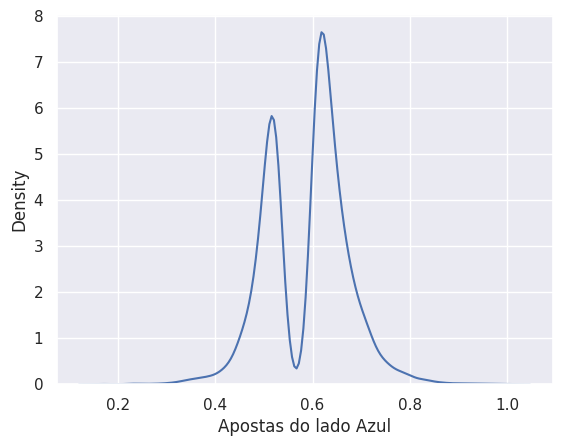

In [ ]:
sns.kdeplot(df_norm['B_odds']).set_xlabel('Apostas do lado Azul')

Utilizando o zscore

In [ ]:
import scipy.stats as stats

df_zscore = df.select_dtypes(include='number').apply(stats.zscore)

In [ ]:
df_zscore

,R_odds,B_odds
0,-0.098649,0.263430
1,1.019535,-0.945249
2,-0.831883,0.976748
3,-0.069319,0.231727
4,-0.153641,0.322873
...,...,...
4235,-0.135310,0.263430
4236,-0.336950,0.421945
4237,-0.520259,0.600275
4238,-1.106847,1.056006


Text(0.5, 0, 'Apostas do lado Vermelho')

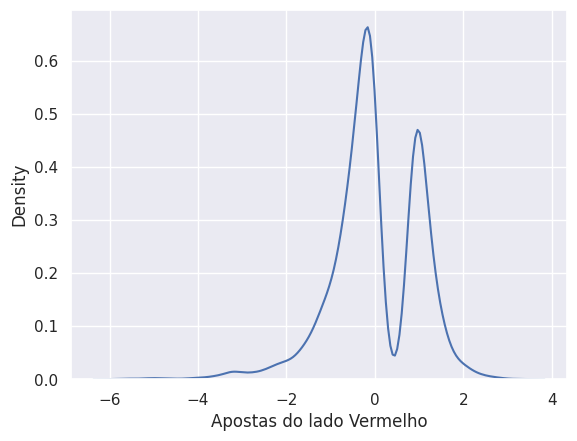

In [ ]:
sns.kdeplot(df_zscore['R_odds']).set_xlabel('Apostas do lado Vermelho')

Text(0.5, 0, 'Apostas do lado Azul')

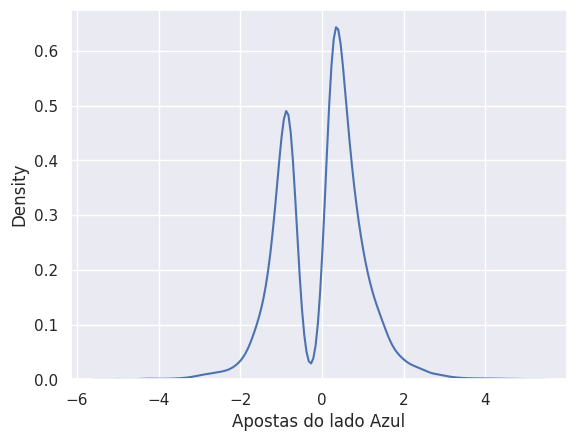

In [ ]:
sns.kdeplot(df_zscore['B_odds']).set_xlabel('Apostas do lado Azul')

Percebe-se que esses dois tipos de alteração interferem negativamente o significado do conceito americano de apostas.